## Relative error of point estimates
#### Calculating relative errors
The size of the sample you take affects how accurately the point estimates reflect the corresponding population parameter. For example, when you calculate a sample mean, you want it to be close to the population mean. However, if your sample is too small, this might not be the case.

The most common metric for assessing accuracy is relative error. This is the absolute difference between the population parameter and the point estimate, all divided by the population parameter. It is sometimes expressed as a percentage.

attrition_pop and mean_attrition_pop (the mean of the Attrition column of attrition_pop) are available; pandas is loaded as pd.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

attrition_pop = pd.read_feather("attrition.feather")
mean_attrition_pop = attrition_pop.Attrition.mean()

# Generate a simple random sample of 50 rows, with seed 2022
attrition_srs50 = attrition_pop.sample(n = 50, random_state = 2022)

# Calculate the mean employee attrition in the sample
mean_attrition_srs50 = attrition_srs50.Attrition.mean()

# Calculate the relative error percentage
rel_error_pct50 = 100 * abs(mean_attrition_pop - mean_attrition_srs50) \
    /mean_attrition_pop

# Print rel_error_pct50
print(rel_error_pct50)

62.78481012658227


In [3]:
# Generate a simple random sample of 100 rows, with seed 2022
attrition_srs100 = attrition_pop.sample(n=100, random_state = 2022)

# Calculate the mean employee attrition in the sample
mean_attrition_srs100 = attrition_srs100.Attrition.mean()

# Calculate the relative error percentage
rel_error_pct100 = 100 * abs(mean_attrition_pop - mean_attrition_srs100) \
    /mean_attrition_pop

# Print rel_error_pct100
print(rel_error_pct100)

6.962025316455695


Samply the best! As you increase the sample size, the sample mean generally gets closer to the population mean, and the relative error decreases.

#### Relative Error vs Sample Size

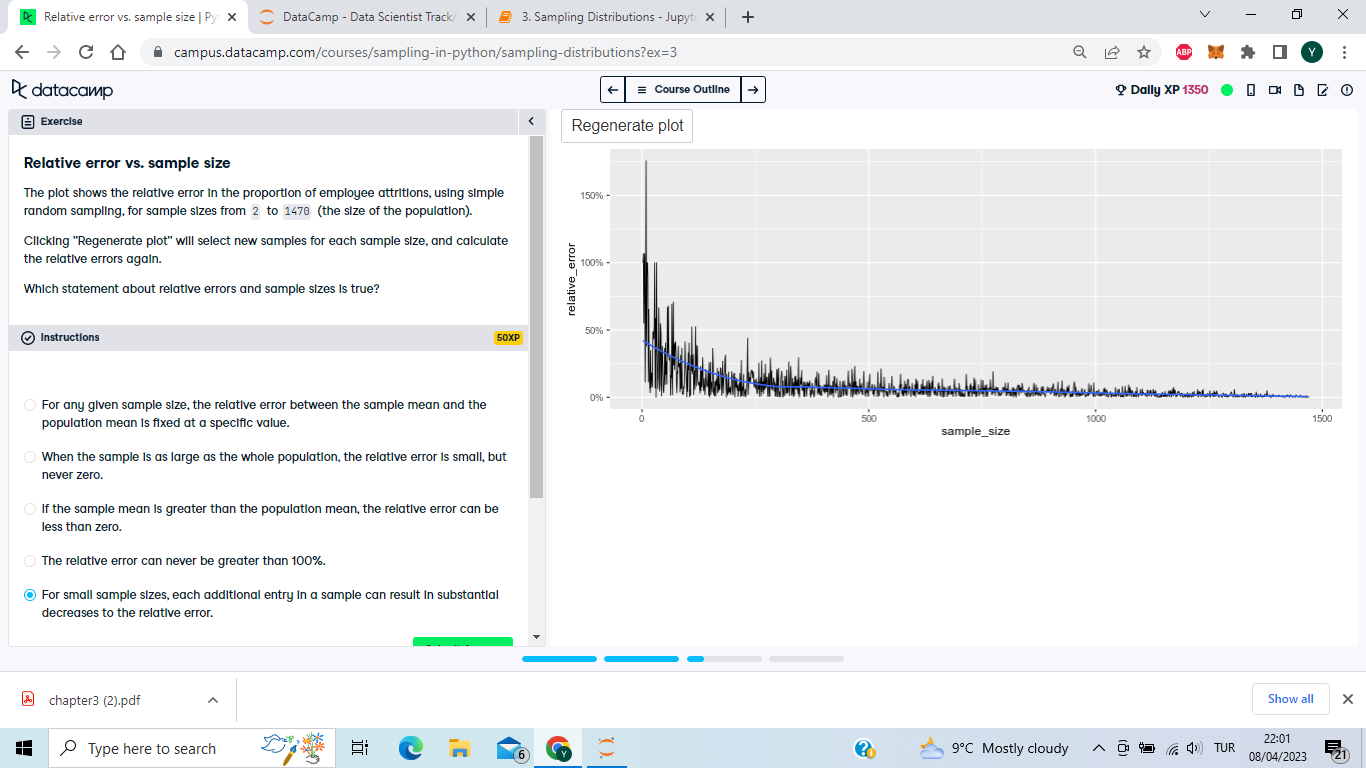

You're relatively great at this! As you increase the sample size, the relative error decreases quickly at first, then more slowly as it drops to zero.

## Creating a sampling distribution
#### Replicating samples
When you calculate a point estimate such as a sample mean, the value you calculate depends on the rows that were included in the sample. That means that there is some randomness in the answer. In order to quantify the variation caused by this randomness, you can create many samples and calculate the sample mean (or another statistic) for each sample.

attrition_pop is available; pandas and matplotlib.pyplot are loaded with their usual aliases.

In [4]:
# Create an empty list
mean_attritions = []
# Loop 500 times to create 500 sample means
for i in range(500):
	mean_attritions.append(
    	attrition_pop.sample(n=60)['Attrition'].mean()
	)
  
# Print out the first few entries of the list
print(mean_attritions[0:5])

[0.16666666666666666, 0.1, 0.11666666666666667, 0.1, 0.25]


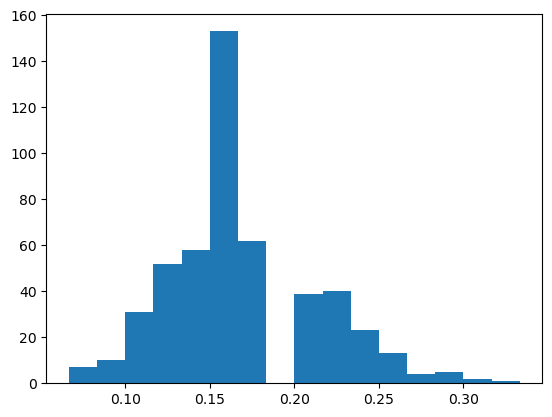

In [5]:
# Create a histogram of the 500 sample means
plt.hist(mean_attritions, bins = 16)
plt.show()

Resplendent replicating! By generating the sample statistic many times with different samples, you can quantify the amount of variation in those statistics.

#### Replication Parameters

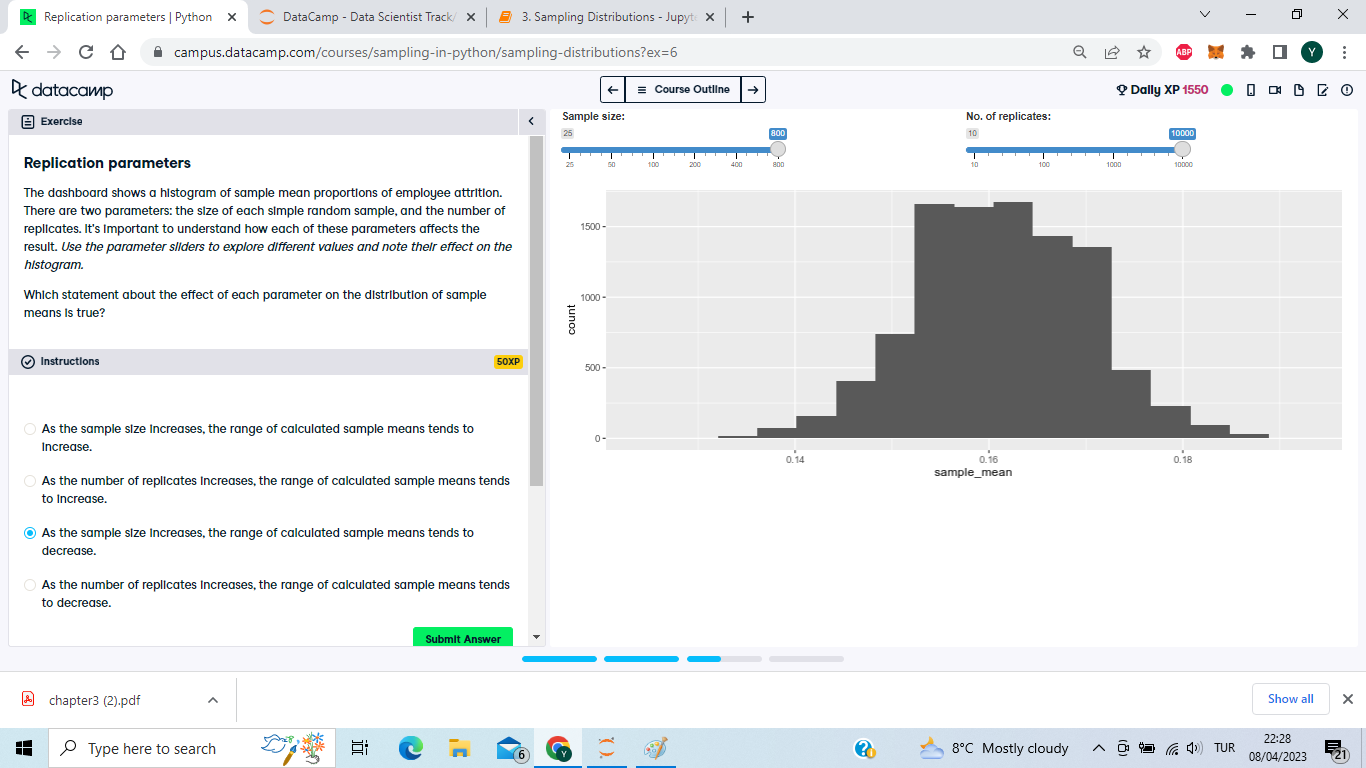

Powerful parameter play! As sample size increases, on average each sample mean has a lower relative error compared to the population mean, thus reducing the range of the distribution.

## Approximate sampling distributions
#### Exact sampling distribution
To quantify how the point estimate (sample statistic) you are interested in varies, you need to know all the possible values it can take and how often. That is, you need to know its distribution.

The distribution of a sample statistic is called the sampling distribution. When we can calculate this exactly, rather than using an approximation, it is known as the exact sampling distribution.

Let's take another look at the sampling distribution of dice rolls. This time, we'll look at five eight-sided dice. (These have the numbers one to eight.)

pandas, numpy, and matplotlib.pyplot are loaded with their usual aliases. The expand_grid() function is also available, which expects a dictionary of key-value pairs as its argument. The definition of the expand_grid() function is provided in the pandas documentation.

In [6]:
import itertools

def expand_grid(data_dict):
    rows = itertools.product(*data_dict.values())
    return pd.DataFrame.from_records(rows, columns=data_dict.keys())

# Expand a grid representing 5 8-sided dice
dice = expand_grid(
  {'die1': [1, 2, 3, 4, 5, 6, 7, 8],
   'die2': [1, 2, 3, 4, 5, 6, 7, 8],
   'die3': [1, 2, 3, 4, 5, 6, 7, 8],
   'die4': [1, 2, 3, 4, 5, 6, 7, 8],
   'die5': [1, 2, 3, 4, 5, 6, 7, 8]
  })

# Print the result
print(dice)

       die1  die2  die3  die4  die5
0         1     1     1     1     1
1         1     1     1     1     2
2         1     1     1     1     3
3         1     1     1     1     4
4         1     1     1     1     5
...     ...   ...   ...   ...   ...
32763     8     8     8     8     4
32764     8     8     8     8     5
32765     8     8     8     8     6
32766     8     8     8     8     7
32767     8     8     8     8     8

[32768 rows x 5 columns]


       die1  die2  die3  die4  die5 mean_roll
0         1     1     1     1     1       1.0
1         1     1     1     1     2       1.2
2         1     1     1     1     3       1.4
3         1     1     1     1     4       1.6
4         1     1     1     1     5       1.8
...     ...   ...   ...   ...   ...       ...
32763     8     8     8     8     4       7.2
32764     8     8     8     8     5       7.4
32765     8     8     8     8     6       7.6
32766     8     8     8     8     7       7.8
32767     8     8     8     8     8       8.0

[32768 rows x 6 columns]


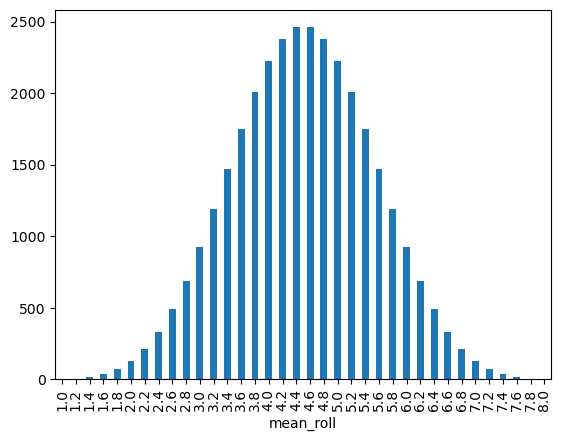

In [7]:
# Add a column of mean rolls and convert to a categorical
dice['mean_roll'] = np.mean(dice, axis = 1)
                     
                    
dice['mean_roll'] = dice['mean_roll'].astype('category')

# Print result
print(dice)

# Draw a bar plot of mean_roll
dice.mean_roll.value_counts(sort=False).plot(kind = 'bar')
plt.show()

Exactly right! The exact sampling distribution shows all possible variations of the point estimate that you are interested in.

In [8]:
dice[(dice.mean_roll == 4.39) | (dice.mean_roll == 4.6)]

,die1,die2,die3,die4,die5,mean_roll
319,1,1,5,8,8,4.6
375,1,1,6,7,8,4.6
382,1,1,6,8,7,4.6
431,1,1,7,6,8,4.6
438,1,1,7,7,7,4.6
...,...,...,...,...,...,...
32393,8,8,3,2,2,4.6
32400,8,8,3,3,1,4.6
32449,8,8,4,1,2,4.6
32456,8,8,4,2,1,4.6


#### Generating an approximate sampling distribution
Calculating the exact sampling distribution is only possible in very simple situations. With just five eight-sided dice, the number of possible rolls is 8**5, which is over thirty thousand. When the dataset is more complicated, for example, where a variable has hundreds or thousands of categories, the number of possible outcomes becomes too difficult to compute exactly.

In this situation, you can calculate an approximate sampling distribution by simulating the exact sampling distribution. That is, you can repeat a procedure over and over again to simulate both the sampling process and the sample statistic calculation process.

pandas, numpy, and matplotlib.pyplot are loaded with their usual aliases.

In [9]:
# Sample one to eight, five times, with replacement
five_rolls = np.random.choice(list(range(1,9)), size=5, replace=True)

# Print the mean of five_rolls
print(five_rolls.mean())

4.8


[5.6, 3.2, 3.8, 3.4, 4.4, 4.6, 3.0, 4.4, 5.6, 5.8]


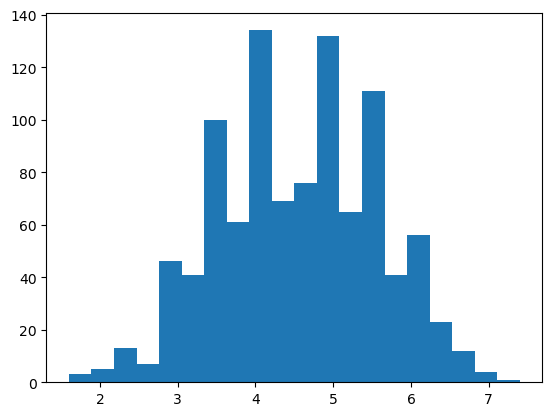

In [10]:
# Replicate the sampling code 1000 times
sample_means_1000 = []
for i in range(1000):
    sample_means_1000.append(
  		np.random.choice(list(range(1, 9)), size=5, replace=True).mean()
    )
    
# Print the first 10 entries of the result
print(sample_means_1000[0:10])

# Draw a histogram of sample_means_1000 with 20 bins
plt.hist(sample_means_1000, bins = 20)
plt.show()

Applaudable approximating! Once your dataset gets sufficiently big, exact sampling distributions cannot be calculated, so an approximate sampling distribution must be used. Notice that the histogram is close to but not exactly the same as the shape of the bar graph from the previous exercise.

#### Exact vs Approximate

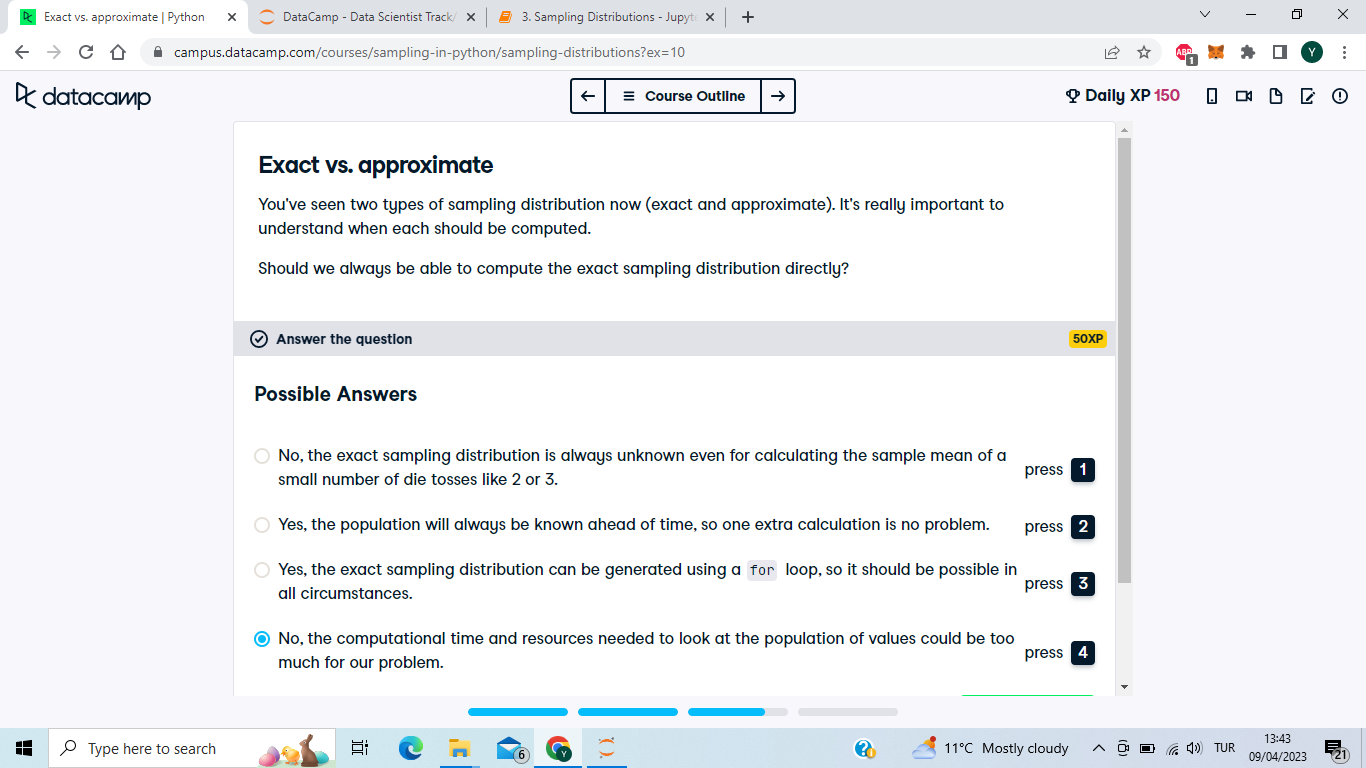

Delightful sampling distribution distinguishing! The exact sampling distribution can only be calculated if you know what the population is and if the problems are small and simple enough to compute. Otherwise, the approximate sampling distribution must be used.

## Standard errors and the Central Limit Theorem
#### Population & sampling distribution means
One of the useful features of sampling distributions is that you can quantify them. Specifically, you can calculate summary statistics on them. Here, you'll look at the relationship between the mean of the sampling distribution and the population parameter's mean.

Three sampling distributions are provided. For each, the employee attrition dataset was sampled using simple random sampling, then the mean attrition was calculated. This was done 1000 times to get a sampling distribution of mean attritions. One sampling distribution used a sample size of 5 for each replicate, one used 50, and one used 500.

attrition_pop, sampling_distribution_5, sampling_distribution_50, and sampling_distribution_500 are available; numpy as np is loaded.

In [11]:
# Replicate the sampling code 1000 times
sampling_distribution_5 = []
for i in range(1000):
    sampling_distribution_5.append(
  		np.random.choice(list(np.arange(0, 0.6, 0.2)), size=5, replace=True).mean()
    )
    
# Replicate the sampling code 1000 times
sampling_distribution_50 = []
for i in range(1000):
    sampling_distribution_50.append(
  		np.random.choice(list(np.arange(0, 0.6, 0.2)), size=50, replace=True).mean()
    )

# Replicate the sampling code 1000 times
sampling_distribution_500 = []
for i in range(1000):
    sampling_distribution_500.append(
  		np.random.choice(list(np.arange(0, 0.6, 0.2)), size=500, replace=True).mean()
    )     

# Calculate the mean of the mean attritions for each sampling distribution
mean_of_means_5 = np.mean(sampling_distribution_5)
mean_of_means_50 = np.mean(sampling_distribution_50)
mean_of_means_500 = np.mean(sampling_distribution_500)

# Print the results
print(mean_of_means_5)
print(mean_of_means_50)
print(mean_of_means_500)

0.19960000000000003
0.19930000000000003
0.199686


#### Question
How does sample size affect the mean of the sample means?<br>
<br>
a.As the sample size increases, the mean of the sampling distribution decreases until it reaches the population mean.<br>
b.As the sample size increases, the mean of the sampling distribution increases until it reaches the population mean.<br>
<strong>c.Regardless of sample size, the mean of the sampling distribution is a close approximation to the population mean.</strong><br>
d.Regardless of sample size, the mean of the sampling distribution is biased and cannot approximate the population mean.

Mind-blowing mean manipulation! Even for small sample sizes, the mean of the sampling distribution is a good approximation of the population mean.

#### Population & sampling distribution variation
You just calculated the mean of the sampling distribution and saw how it is an estimate of the corresponding population parameter. Similarly, as a result of the central limit theorem, the standard deviation of the sampling distribution has an interesting relationship with the population parameter's standard deviation and the sample size.

attrition_pop, sampling_distribution_5, sampling_distribution_50, and sampling_distribution_500 are available; numpy is loaded with its usual alias.

In [12]:
# Calculate the std. dev. of the mean attritions for each sampling distribution
sd_of_means_5 = np.std(sampling_distribution_5, ddof = 1)
sd_of_means_50 = np.std(sampling_distribution_50, ddof = 1)
sd_of_means_500 = np.std(sampling_distribution_500, ddof = 1)

# Print the results
print(sd_of_means_5)
print(sd_of_means_50)
print(sd_of_means_500)

0.07340046067721664
0.02351133307115491
0.007193621632543109


#### Question
How are the standard deviations of the sampling distributions related to the population standard deviation and the sample size?<br>
<br>
a.The standard deviation of the sampling distribution is approximately equal to the population standard deviation, regardless of sample size.<br>
b.The standard deviation of the sampling distribution is approximately equal to the population standard deviation multiplied by the sample size.<br>
c.The standard deviation of the sampling distribution is approximately equal to the population standard deviation multiplied by the square root of the sample size.<br>
d.The standard deviation of the sampling distribution is approximately equal to the population standard deviation divided by the sample size.<br>
<strong>e.The standard deviation of the sampling distribution is approximately equal to the population standard deviation divided by the square root of the sample size.</strong>

You set the gold standard for standard deviation! The amount of variation in the sampling distribution is related to the amount of variation in the population and the sample size. This is another consequence of the Central Limit Theorem.